In [224]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from progressbar import progressbar

# Linear Regression 

$$\hat{y}=X(X^TX)^{-1}X^Ty$$
$$P\equiv X(X^TX)^{-1}X^T,\;\;P^2=P $$

$P$ therefore represents a probability transition matrix which has the property that
$$\sum_jP_{ij}=1$$

We approximate $$\begin{aligned}y=&E(y|X=x)+\epsilon\\
=&\beta_0+\sum_j X_{j}\beta_j+\epsilon\end{aligned}$$

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

Fake data

In [1427]:
L=100
n1=np.random.multivariate_normal([0,0],[[1,0],[0,1]],L)
n2=np.random.multivariate_normal([5,5],[[1,0],[0,1]],L)
n3=np.random.multivariate_normal([10,10],[[1,0],[0,1]],L)

In [1428]:
n1=np.concatenate([n1,np.zeros((L,1),int)],axis=1)
n2=np.concatenate([n2,np.ones((L,1),int)],axis=1)
n3=np.concatenate([n3,2*np.ones((L,1),int)],axis=1)

In [1429]:
n=np.concatenate([n1,n2,n3])

In [1430]:
data=pd.DataFrame(n, columns=['x','y','target'])

In [1431]:
data=data.astype({'target':'int32'})

Regession

In [9]:
lr=LinearRegression()

In [10]:
enc=OneHotEncoder()
Y=enc.fit_transform(data['target'].values.reshape(-1,1))

In [11]:
lr.fit(data[['x','y']],Y.toarray())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lr.score(data[['x','y']],Y.toarray())

/home/joao/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.4858070501454922

In [13]:
enc.categories_

[array([0, 1, 2], dtype=int32)]

In [14]:
lr.coef_

array([[-0.05000616, -0.04723771],
       [ 0.00112005, -0.00149327],
       [ 0.0488861 ,  0.04873097]])

In [15]:
lr.intercept_

array([ 0.81874301,  0.33522024, -0.15396326])

In [16]:
class decision:
    def __init__(self,model):
        
        self.model=model
    
    def bnd(self,x,cl1,cl2):
        a=-(self.model.coef_[cl1]-self.model.coef_[cl2])[0]/(self.model.coef_[cl1]-self.model.coef_[cl2])[1]
        b=-(self.model.intercept_[cl1]-self.model.intercept_[cl2])/(self.model.coef_[cl1]-self.model.coef_[cl2])[1]
        
        return a*x+b

In [17]:
lr_bnd=decision(lr)

In [18]:
p1=[0,12]
p2=[lr_bnd.bnd(0,0,1),lr_bnd.bnd(12,0,1)]

p3=[0,12]
p4=[lr_bnd.bnd(0,1,2),lr_bnd.bnd(12,1,2)]

p5=[0,12]
p6=[lr_bnd.bnd(0,0,2),lr_bnd.bnd(12,0,2)]

In [19]:
sns.set()

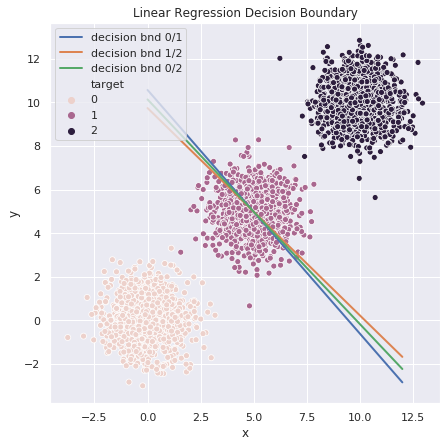

In [20]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=data,x='x',y='y',hue='target')
plt.plot(p1,p2,linewidth=2,label='decision bnd 0/1')
plt.plot(p3,p4,linewidth=2,label='decision bnd 1/2')
plt.plot(p5,p6,linewidth=2,label='decision bnd 0/2')
plt.legend(loc='best')
plt.title('Linear Regression Decision Boundary')
plt.show()

# Logistic Regression

Apply logistic regression instead

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
Lgr=LogisticRegression()

In [23]:
Lgr.fit(data[['x','y']],data.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
Lgr.score(data[['x','y']],data.target)

0.9993333333333333

In [25]:
Lgr.coef_

array([[-2.16181952e+00, -2.06940155e+00],
       [ 2.53653563e-04,  2.90052081e-02],
       [ 2.16156587e+00,  2.04039634e+00]])

In [26]:
logit_bnd=decision(Lgr)

In [27]:
p1=[0,12]
p2=[logit_bnd.bnd(0,0,1),logit_bnd.bnd(12,0,1)]

p3=[0,12]
p4=[logit_bnd.bnd(0,1,2),logit_bnd.bnd(12,1,2)]

p5=[0,12]
p6=[logit_bnd.bnd(0,0,2),logit_bnd.bnd(12,0,2)]

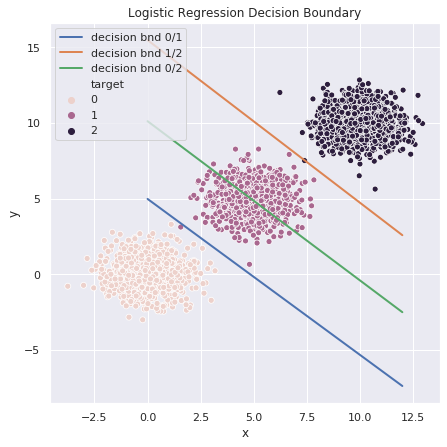

In [28]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=data,x='x',y='y',hue='target')
plt.plot(p1,p2,linewidth=2,label='decision bnd 0/1')
plt.plot(p3,p4,linewidth=2,label='decision bnd 1/2')
plt.plot(p5,p6,linewidth=2,label='decision bnd 0/2')
plt.legend(loc='best')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## Iris Dataset

In [33]:
data_iris=load_iris()

In [34]:
data_iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
data_iris['data'].shape

(150, 4)

In [36]:
LR=LogisticRegression()

In [37]:
LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [38]:
LR.max_iter=1000

In [39]:
x_train,x_test,y_train,y_test=train_test_split(data_iris['data'],data_iris['target'],test_size=0.2)

In [40]:
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
accuracy_score(LR.predict(x_test),y_test)

0.9333333333333333

In [42]:
accuracy_score(LR.predict(x_train),y_train)

0.975

In [43]:
predictions=np.concatenate((data_iris['data'],LR.predict(data_iris['data']).reshape(150,1)),axis=1)

In [44]:
df_predictions=pd.DataFrame(predictions,columns=['ft1','ft2','ft3','ft4','target'])

In [45]:
df=pd.DataFrame(np.concatenate((data_iris['data'],data_iris['target'].reshape(150,1)),axis=1),columns=['ft1','ft2','ft3','ft4','target'])

In [46]:
df_predictions

,ft1,ft2,ft3,ft4,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [47]:
set(df['target'])

{0.0, 1.0, 2.0}

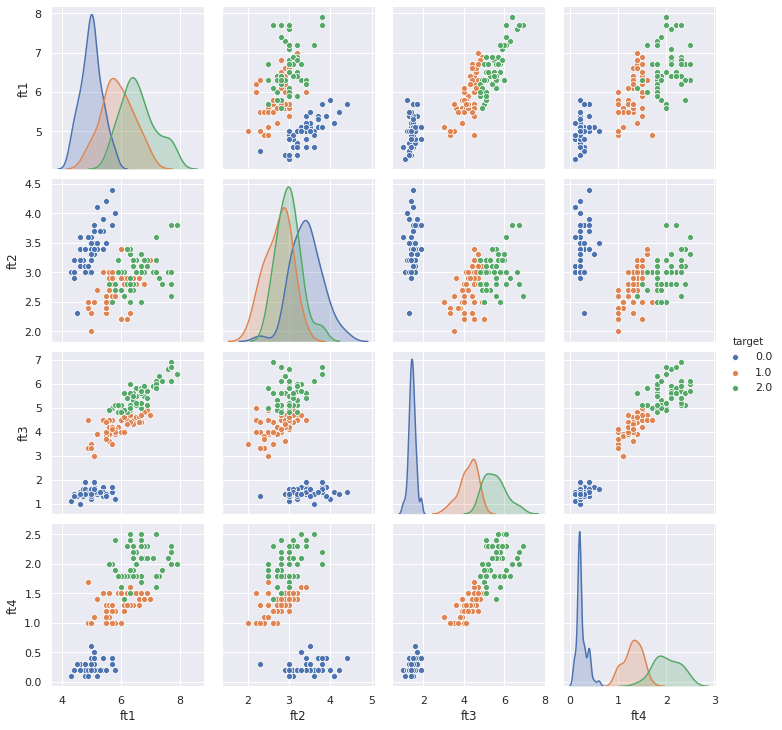

In [48]:
sns.pairplot(data=df_predictions,hue='target')

### Programme it from scratch

$$P(y_k=k|x)=\frac{e^{-w_i^kx^i}}{\sum_ke^{-w_i^kx^i}}$$

$$f_{\mu\nu}\equiv\frac{\partial L}{\partial \omega^{\mu}_{\nu}}=\frac{1}{N}\sum_{(x,y)}\delta^{k(y)}_{\mu}x^{\nu}-\frac{1}{N}\sum_{(x,y)}x^{\nu}P_{\mu}(x)$$

$$\frac{\partial^2 L}{\partial \omega^{\mu}_{\nu}\partial \omega^{\alpha}_{\beta}}=\frac{1}{N}\sum_{(x,y)}x^{\nu}x^{\beta}\delta_{\mu\alpha}P_{\mu}-x^{\nu}x^{\beta}P_{\mu}P_{\alpha}$$

where $x^{\mu}_0=1$ and $\omega^0_{\nu}=0$

In [30]:
class Logit:
    def __init__(self,n_features,n_classes):
        self.n_features=n_features
        self.n_classes=n_classes
        self.weight=np.random.normal(0,0.1,(n_classes,n_features))
        self.weight[0]=0
        
    def __call__(self,x):
        
        wx=-np.dot(x,self.weight.T)
        wx=np.exp(wx)
        Z=wx.sum(1).reshape(-1,1)
        return wx/Z

In [31]:
class logloss:
    def __init__(self,model):
        
        self.prob=model
        self.delta_w=None
        self.nf=model.n_features
        self.nc=model.n_classes
        
    def backward(self,x,y):
        p=self.prob(x)
        z=np.tensordot(x,y[:,1:]-p[:,1:],axes=[0,0])
        z=z.reshape(-1,1)
        z=z/x.shape[0]
        
        return z
    
    def back_square(self,x):
        p=self.prob(x)
        p=p[:,1:]
        
        z=0
        for a,b in zip(x,p):
            idt=np.diag(b)
            k=np.outer(a,a)
            w=np.outer(b,b)
            z+=np.tensordot(k,idt-w,axes=0)
        z=np.transpose(z,(0,2,1,3))
        z=z.reshape(z.shape[0],z.shape[1],z.shape[2]*z.shape[3])
        z=z.reshape(z.shape[0]*z.shape[1],-1)
        z=z/x.shape[0]
        
        return z
    
    def step(self):
        
        self.prob.weight[1:,:]+=self.delta_w
        
    def delta(self,x,y):
        
        f=self.backward(x,y)
        M=self.back_square(x)
        M_inv=np.linalg.inv(M)
        delta_w=-np.dot(M_inv,f)
        delta_w=delta_w.reshape(self.nf,-1)
        delta_w=delta_w.T
        return delta_w
        
    def __call__(self,x,y):
        #y is hot encoded
        p=self.prob(x)
        p=p*y
        p=p.sum(1)
        self.delta_w=self.delta(x,y)
        
        return -np.log(p).mean()

### Newton-Raphson method

In [32]:
def training(model,x,y,num_iter=10):
    loss=logloss(model)
    for i in range(num_iter):
        L=loss(x,y)
        loss.step()
        print("Loss=",L," iter:",i)

In [49]:
y=enc.fit_transform(y_train.reshape(-1,1))

In [50]:
model=Logit(5,3)

In [51]:
X=np.concatenate([x_train,np.ones((x_train.shape[0],1))],axis=1)

In [52]:
training(model,X,y.toarray(),10)

Loss= 1.132071550893284  iter: 0
Loss= 0.39527765887814137  iter: 1
Loss= 0.23293349410262507  iter: 2
Loss= 0.1204119238092625  iter: 3
Loss= 0.0764595509536848  iter: 4
Loss= 0.05825789321079276  iter: 5
Loss= 0.050498087896463074  iter: 6
Loss= 0.047348357827005604  iter: 7
Loss= 0.04640902616388638  iter: 8
Loss= 0.046230548161667495  iter: 9


In [53]:
(model(X).argmax(1)==y_train).sum()/x_train.shape[0]

0.9833333333333333

# Linear Discriminant Analysis

$$P(x|y=k)=\frac{1}{\sqrt{2\pi\text{det}\Sigma}}e^{-\frac{1}{2}(x-\mu_k)^T\Sigma^{-1}(x-\mu_k)}$$

$$P(y=k|x)=\frac{e^{-\frac{1}{2}(x-\mu_k)^T\Sigma^{-1}(x-\mu_k)}P(k)}{\sum_le^{-\frac{1}{2}(x-\mu_l)^T\Sigma^{-1}(x-\mu_l)}P(l)}$$

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [55]:
lda=LinearDiscriminantAnalysis(solver='lsqr')

In [56]:
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='lsqr', store_covariance=False, tol=0.0001)

from scratch

In [57]:
class LDAmodel:
    
    def __init__(self,sigma=None,mu=None,prior_prob=None):
        self.sigma=sigma
        self.mu=mu
        self.prior_prob=prior_prob
        if sigma==None:
            self.inv=None
            self.det=None
        else:
            self.inv=np.linalg.inv(sigma)
            self.det=np.linalg.det(sigma)
        if mu==None:
            self.nc=None
            self.dim=None
        else:
            self.nc=mu.shape[0]
            self.dim=mu.shape[1]
        
        self.coef_=None
        self.intercept_=None
        
    def means(self,x,y):
        yset=set(y)
        means=np.zeros((len(yset),x.shape[1]))
        for i in yset:
            means[i]=x[y==i].mean(0)
        return means
    
    def var(self,x,y):
        yset=set(y)
        d=x.shape[1]
        var=np.zeros((d,d))
        means=self.means(x,y)
        for i in yset:
            c=x[y==i]-means[i]
            var+=np.tensordot(c,c,axes=[0,0])
        var=var/x.shape[0]
        
        return var
    
    def priors(self,x,y):
        priors=np.zeros(3)
        yset=set(y)
        for i in yset:
            priors[i]=(y==i).sum()/y.shape[0]
        
        return priors
    
    def fit(self,x,y):
        self.mu=self.means(x,y)
        self.sigma=self.var(x,y)
        self.prior_prob=self.priors(x,y)
        self.inv=np.linalg.inv(self.sigma)
        self.det=np.linalg.det(self.sigma)
        self.nc=len(set(y))
        self.dim=x.shape[1]
        
        self.coef_=np.dot(self.mu,self.inv)
        self.intercept_=np.zeros(self.nc)
        for i in range(self.nc):
            v=np.dot(self.inv,self.mu[i])
            self.intercept_[i]=-0.5*np.dot(self.mu[i],v)
        
    def __call__(self,x):
        probs=np.zeros((x.shape[0],self.nc))
        for i in range(self.nc):
            t=x-self.mu[i]
            w=np.dot(t,self.inv)
            w=(t*w).sum(1)
            probs[:,i]=np.exp(-0.5*w)*self.priors[i]
            probs[:,i]=probs[:,i]/((2*np.pi)**(self.dim/2)*np.sqrt(np.abs(self.det)))
        Z=probs.sum(1)
        return probs/Z.reshape(-1,1)

In [58]:
ldam=LDAmodel()

In [59]:
ldam.fit(data[['x','y']].values,data['target'].values)

In [60]:
lda_bnd=decision(ldam)

In [61]:
p1=[0,12]
p2=[lda_bnd.bnd(0,0,1),lda_bnd.bnd(12,0,1)]

p3=[0,12]
p4=[lda_bnd.bnd(0,1,2),lda_bnd.bnd(12,1,2)]

p5=[0,12]
p6=[lda_bnd.bnd(0,0,2),lda_bnd.bnd(12,0,2)]

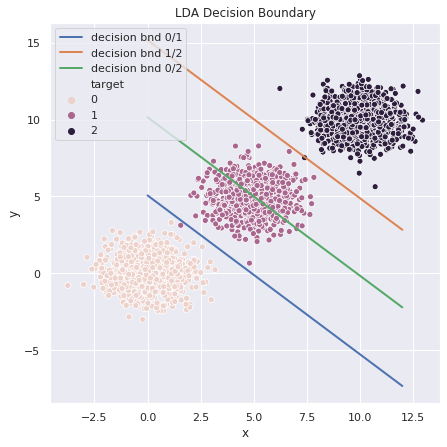

In [62]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=data,x='x',y='y',hue='target')
plt.plot(p1,p2,linewidth=2,label='decision bnd 0/1')
plt.plot(p3,p4,linewidth=2,label='decision bnd 1/2')
plt.plot(p5,p6,linewidth=2,label='decision bnd 0/2')
plt.legend(loc='best')
plt.title('LDA Decision Boundary')
plt.show()

# Hyperplanes and Support Vector Machines

In [63]:
from sklearn.svm import LinearSVC,SVC

In [1293]:
lsvc=LinearSVC(max_iter=20000)

In [1432]:
svc=SVC(kernel='linear',C=10000,decision_function_shape='ovo')

In [1433]:
svc.fit(data[['x','y']],data['target'])

SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
lsvc.fit(data[['x','y']],data['target'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=20000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [68]:
lsvc.score(data[['x','y']],data['target'])

0.9986666666666667

In [1434]:
svc.score(data[['x','y']],data['target'])

1.0

In [1435]:
svc.coef_

array([[-0.48874376, -0.53477928],
       [-0.16378124, -0.13423821],
       [-0.84858765, -0.52828623]])

In [1436]:
svc.intercept_

array([ 2.85481354,  1.5446955 , 10.80866213])

In [1437]:
svc.support_vectors_

array([[2.95289203, 0.45302194],
       [1.92259693, 1.71174332],
       [4.87741747, 2.75114441],
       [1.6925577 , 5.66044668],
       [6.79567868, 7.65102574],
       [8.91508084, 8.07924849],
       [9.32366057, 7.58328722],
       [8.49423558, 8.70845832]])

In [1438]:
svc.classes_

array([0, 1, 2], dtype=int32)

In [1439]:
svc_bnd=decision(svc)

In [1440]:
p1=[0,12]
p2=[svc_bnd.bnd(0,0,1),svc_bnd.bnd(12,0,1)]

p3=[0,12]
p4=[svc_bnd.bnd(0,1,2),svc_bnd.bnd(12,1,2)]

p5=[0,12]
p6=[svc_bnd.bnd(0,0,2),svc_bnd.bnd(12,0,2)]

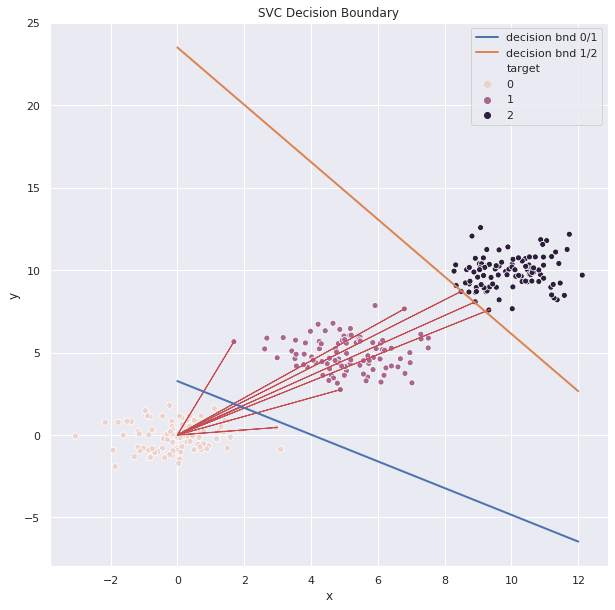

In [1441]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x='x',y='y',hue='target')
plt.plot(p1,p2,linewidth=2,label='decision bnd 0/1')
plt.plot(p3,p4,linewidth=2,label='decision bnd 1/2')
#plt.plot(p5,p6,linewidth=2,label='decision bnd 0/2')
for v in svc.support_vectors_:
    plt.arrow(0,0,v[0],v[1],label='support vec 1',color='r',head_width=0.04)
plt.legend(loc='best')
plt.title('SVC Decision Boundary')
plt.show()

from scratch
$$\text{min}_{w,b} |w|^2 +\frac{1}{m}\sum_i \text{max}(0,1-y_i(x_i^Tw+b))$$

$$L_D=\sum_i \alpha_i -\frac{1}{2}\sum_{i,j}\alpha_i\alpha_jy_iy_jx_i^{T}x_j$$

In [1263]:
import random
import cvxopt

In [1474]:
class SVCmodel:
    def __init__(self,num_iter=10**5,lr=0.001,kernel='linear'):
        self.kernel=kernel
        print("Using kernel: ",kernel)
        self.coef_=None
        self.intercept_={}
        self.weight_={}
        self.support_vectors_={}
        self.classes=None
        self.num_iter=num_iter
        self.lr=lr
    
    
    def fit(self,x,y):
        y_aux=y.copy().reshape(-1,1)
        y_aux=y_aux.astype('float64')
        self.classes=set(y)
        pairs=[]
        for i in self.classes:
            for j in self.classes:
                if j>i:
                    pairs.append((i,j))
        
        for pair in pairs:
            i,j=pair
            idx=(y_aux==i) | (y_aux==j)
            idx=idx.reshape(-1,)
            x_temp=x[idx].copy()
            y_temp=y_aux[idx].copy()
            y_temp[y_temp==j]=-1.0
            y_temp[y_temp==i]=1.0
            
            z=y_temp*x_temp
            Q=0.5*np.tensordot(z,z,axes=[(1),(1)])
            print(Q.shape)
            Q=cvxopt.matrix(Q.tolist())
            p=-1*np.ones(x_temp.shape[0])
            p=cvxopt.matrix(p.tolist())
            G=-1*np.identity(x_temp.shape[0])
            G=cvxopt.matrix(G.tolist())
            h=np.zeros(x_temp.shape[0])
            h=cvxopt.matrix(h.tolist())
            A=matrix(y_temp.tolist())
            b=matrix(0.0)

            sol=cvxopt.solvers.qp(Q, p, G, h, A, b)
            sol=np.array(sol['x'])
            sup_vec_loc=np.round(sol,2).reshape(-1,)
            sol[sup_vec_loc==0]=0
            sup_vec_loc=sup_vec_loc!=0
            sup_vec=x_temp[sup_vec_loc]
            self.support_vectors_[pair]=sup_vec
            w=((sol*y_temp)*x_temp).sum(0)
            y_s=y_temp[sup_vec_loc]
            v=np.dot(sup_vec,w.reshape(-1,1))
            coef=(y_s*v).mean()-y_s.mean()*v.mean()
            coef=coef/(v.var())
            intercept=y_s.mean()-coef*v.mean()
            self.intercept_[pair]=intercept
            self.weight_[pair]=coef*w
            
        print('Done')
        
    def set_kernel(self,kernel):
        self.kernel=kernel

In [1475]:
sv=SVCmodel()

Using kernel:  linear


In [1476]:
sv.fit(data[['x','y']].values,data['target'].values)

(200, 200)
     pcost       dcost       gap    pres   dres
 0: -1.5261e+01 -2.6743e+01  6e+02  2e+01  2e+00
 1: -1.1432e+01 -3.6616e+00  9e+01  4e+00  3e-01
 2: -8.5151e-01 -8.2929e-01  1e+01  4e-01  3e-02
 3: -8.5659e-02 -6.8574e-01  6e-01  2e-16  2e-15
 4: -3.0868e-01 -5.3063e-01  2e-01  1e-16  2e-15
 5: -4.3593e-01 -5.3660e-01  1e-01  1e-16  2e-15
 6: -5.2334e-01 -5.2535e-01  2e-03  2e-16  2e-15
 7: -5.2498e-01 -5.2500e-01  2e-05  2e-16  2e-15
 8: -5.2499e-01 -5.2499e-01  2e-07  1e-16  2e-15
Optimal solution found.
(200, 200)
     pcost       dcost       gap    pres   dres
 0: -4.1001e+00 -5.6890e+00  4e+02  2e+01  1e+00
 1: -6.8694e-01 -1.5139e-01  1e+01  6e-01  4e-02
 2:  1.0300e-03 -1.1697e-01  2e-01  5e-03  4e-04
 3: -2.3503e-02 -5.4570e-02  3e-02  4e-17  8e-16
 4: -3.2990e-02 -4.6402e-02  1e-02  2e-17  5e-16
 5: -3.8564e-02 -4.6494e-02  8e-03  8e-18  5e-16
 6: -4.4661e-02 -4.4910e-02  2e-04  5e-19  7e-16
 7: -4.4788e-02 -4.4847e-02  6e-05  2e-17  7e-16
 8: -4.4791e-02 -4.4850e-

In [1477]:
sv.weight_

{(0, 1): array([-0.48867857, -0.53496429]),
 (0, 2): array([-0.16342379, -0.13463071]),
 (1, 2): array([-0.84859241, -0.52827718])}

In [1478]:
svc.coef_

array([[-0.48874376, -0.53477928],
       [-0.16378124, -0.13423821],
       [-0.84858765, -0.52828623]])

In [1472]:
sv.intercept_

{(0, 1): 2.855253476827533,
 (0, 2): 1.5446513018163646,
 (1, 2): 10.808623705748472}

In [1479]:
x.shape[0]

30

## SMO algorithm

In [1672]:
y=data['target'].values.copy()
y=y.reshape(-1,1)
x=data[['x','y']].values.copy()
idx=(y==0)|(y==1)
idx=idx.reshape(-1,)
x=x[idx]
y=y[idx]
y[y!=0]=-1.0
y[y==0]=1.0

alpha=np.random.normal(0,10,(y.shape[0],1))
alpha=np.abs(alpha)

l=[i for i in range(x.shape[0])]

num_iter=0
not_converged=True
alpha_prev=alpha.copy()
while not_converged and num_iter<10000:
   
    i,j=random.sample(l,2)
    alpha0=alpha[i][0]
    alpha1=alpha[j][0]
    y0=y[i][0]
    y1=y[j][0]
    
    k=-(alpha*y).sum()+alpha0*y0+alpha1*y1
    if y1*k<0 and y0*y1>0:
        continue
    A=(alpha*y*x).sum(0)-alpha0*y0*x[i]-alpha1*y1*x[j]
    B=x[i]-x[j]
    a=1-y0*y1-y0*k*np.dot(B,x[j])-y0*np.dot(B,A)
    a=a/(np.dot(B,B))
    
    alpha0=max(0,a)
    alpha1=y1*k-alpha0*y0*y1
    if alpha1<0:
        alpha1=0
        alpha0=k*y0
        
    alpha[i][0]=alpha0
    alpha[j][0]=alpha1
    
    error=alpha-alpha_prev    
    error=error.var()
    if error<10**(-10):
        not_converged=False
        print('converged')
    alpha_prev=alpha.copy()
    num_iter+=1

converged


In [1674]:
num_iter

6

In [1531]:
a=np.array([1,2,3])

In [1533]:
b=a

In [1536]:
a[1]=1000

In [1538]:
b

array([   1, 1000,    3])